In [1]:
import os
import pandas as pd
from comparison import ModelEvaluator, ModelComparison

def load_data(directory='results', labels_filename='Labels.csv'):
    labels_path = os.path.join(directory, labels_filename)
    df_labels = pd.read_csv(labels_path)

    evaluators = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv') and filename != labels_filename:
            model_name = os.path.splitext(filename)[0]
            df_model = pd.read_csv(os.path.join(directory, filename))
            evaluator = ModelEvaluator(df_labels, df_model, model_name)
            evaluators.append(evaluator)

    model_comparison = ModelComparison(evaluators)
    return model_comparison

model_comparison = load_data()

combined_df = model_comparison.combined_df


combined_df.head()

Model    Category                 Class  Precision    Recall  F1 Score  \
0  GPT-4o  main-event             collision   0.824561  0.056119  0.105087   
1  GPT-4o  main-event        near-collision   0.670103  0.007473  0.014781   
2  GPT-4o  main-event  Overall (main-event)   0.747332  0.031796  0.059934   
3  GPT-4o    location                 alley   0.338710  0.091703  0.144330   
4  GPT-4o    location               highway   0.814529  0.877846  0.845003   

   Accuracy  Balanced Acc.  Support  
0       NaN            NaN     1675  
1       NaN            NaN     8698  
2  0.015328       0.031796    10373  
3       NaN            NaN      229  
4       NaN            NaN     1801

In [2]:
model_comparison.evaluators[0].metrics_df

Model            Category                         Class  Precision  \
0   GPT-4o          main-event                     collision   0.824561   
1   GPT-4o          main-event                near-collision   0.670103   
2   GPT-4o          main-event          Overall (main-event)   0.747332   
3   GPT-4o            location                         alley   0.338710   
4   GPT-4o            location                       highway   0.814529   
5   GPT-4o            location                     main-road   0.945036   
6   GPT-4o            location                   parking-lot   0.701493   
7   GPT-4o            location            Overall (location)   0.699942   
8   GPT-4o                zone                         rural   0.511628   
9   GPT-4o                zone                       suburbs   0.495000   
10  GPT-4o                zone                       unknown   0.250000   
11  GPT-4o                zone                         urban   0.816060   
12  GPT-4o                zone                Overall (zone)   0.518172   
13  GPT-4o    light-conditions                      daylight   0.972007   
14  GPT-4o    light-conditions                         night   0.966159   
15  GPT-4o    light-conditions                      twilight   0.601399   
16  GPT-4o    light-conditions    Overall (light-conditions)   0.846521   
17  GPT-4o  weather-conditions                     clear-sky   0.858041   
18  GPT-4o  weather-conditions                        cloudy   0.778120   
19  GPT-4o  weather-conditions                          rain   0.798278   
20  GPT-4o  weather-conditions  Overall (weather-conditions)   0.811480   
21  GPT-4o    vehicles-density                          high   0.812375   
22  GPT-4o    vehicles-density                           low   0.499661   
23  GPT-4o    vehicles-density                        medium   0.220012   
24  GPT-4o    vehicles-density    Overall (vehicles-density)   0.510683   

      Recall  F1 Score  Accuracy  Balanced Acc.  Support  
0   0.056119  0.105087       NaN            NaN     1675  
1   0.007473  0.014781       NaN            NaN     8698  
2   0.031796  0.059934  0.015328       0.031796    10373  
3   0.091703  0.144330       NaN            NaN      229  
4   0.877846  0.845003       NaN            NaN     1801  
5   0.944343  0.944689       NaN            NaN     8175  
6   0.839286  0.764228       NaN            NaN      168  
7   0.688294  0.674562  0.912272       0.688294    10373  
8   0.057441  0.103286       NaN            NaN      383  
9   0.214595  0.299395       NaN            NaN     1384  
10  0.002169  0.004301       NaN            NaN      461  
11  0.974463  0.888255       NaN            NaN     8145  
12  0.312167  0.323809  0.796009       0.312167    10373  
13  0.968089  0.970044       NaN            NaN     5954  
14  0.977267  0.971681       NaN            NaN     3827  
15  0.581081  0.591065       NaN            NaN      592  
16  0.842146  0.844263  0.949388       0.842146    10373  
17  0.978125  0.914156       NaN            NaN     7817  
18  0.276409  0.407916       NaN            NaN     1827  
19  0.890261  0.841764       NaN            NaN      729  
20  0.714932  0.721279  0.848356       0.714932    10373  
21  0.069053  0.127287       NaN            NaN     5894  
22  0.315654  0.386894       NaN            NaN     2338  
23  0.862681  0.350607       NaN            NaN     2141  
24  0.415796  0.288263  0.288441       0.415796    10373

In [3]:
combined_df.loc[combined_df['Model']=='GPT-4o']

Model            Category                         Class  Precision  \
0   GPT-4o          main-event                     collision   0.824561   
1   GPT-4o          main-event                near-collision   0.670103   
2   GPT-4o          main-event          Overall (main-event)   0.747332   
3   GPT-4o            location                         alley   0.338710   
4   GPT-4o            location                       highway   0.814529   
5   GPT-4o            location                     main-road   0.945036   
6   GPT-4o            location                   parking-lot   0.701493   
7   GPT-4o            location            Overall (location)   0.699942   
8   GPT-4o                zone                         rural   0.511628   
9   GPT-4o                zone                       suburbs   0.495000   
10  GPT-4o                zone                       unknown   0.250000   
11  GPT-4o                zone                         urban   0.816060   
12  GPT-4o                zone                Overall (zone)   0.518172   
13  GPT-4o    light-conditions                      daylight   0.972007   
14  GPT-4o    light-conditions                         night   0.966159   
15  GPT-4o    light-conditions                      twilight   0.601399   
16  GPT-4o    light-conditions    Overall (light-conditions)   0.846521   
17  GPT-4o  weather-conditions                     clear-sky   0.858041   
18  GPT-4o  weather-conditions                        cloudy   0.778120   
19  GPT-4o  weather-conditions                          rain   0.798278   
20  GPT-4o  weather-conditions  Overall (weather-conditions)   0.811480   
21  GPT-4o    vehicles-density                          high   0.812375   
22  GPT-4o    vehicles-density                           low   0.499661   
23  GPT-4o    vehicles-density                        medium   0.220012   
24  GPT-4o    vehicles-density    Overall (vehicles-density)   0.510683   

      Recall  F1 Score  Accuracy  Balanced Acc.  Support  
0   0.056119  0.105087       NaN            NaN     1675  
1   0.007473  0.014781       NaN            NaN     8698  
2   0.031796  0.059934  0.015328       0.031796    10373  
3   0.091703  0.144330       NaN            NaN      229  
4   0.877846  0.845003       NaN            NaN     1801  
5   0.944343  0.944689       NaN            NaN     8175  
6   0.839286  0.764228       NaN            NaN      168  
7   0.688294  0.674562  0.912272       0.688294    10373  
8   0.057441  0.103286       NaN            NaN      383  
9   0.214595  0.299395       NaN            NaN     1384  
10  0.002169  0.004301       NaN            NaN      461  
11  0.974463  0.888255       NaN            NaN     8145  
12  0.312167  0.323809  0.796009       0.312167    10373  
13  0.968089  0.970044       NaN            NaN     5954  
14  0.977267  0.971681       NaN            NaN     3827  
15  0.581081  0.591065       NaN            NaN      592  
16  0.842146  0.844263  0.949388       0.842146    10373  
17  0.978125  0.914156       NaN            NaN     7817  
18  0.276409  0.407916       NaN            NaN     1827  
19  0.890261  0.841764       NaN            NaN      729  
20  0.714932  0.721279  0.848356       0.714932    10373  
21  0.069053  0.127287       NaN            NaN     5894  
22  0.315654  0.386894       NaN            NaN     2338  
23  0.862681  0.350607       NaN            NaN     2141  
24  0.415796  0.288263  0.288441       0.415796    10373

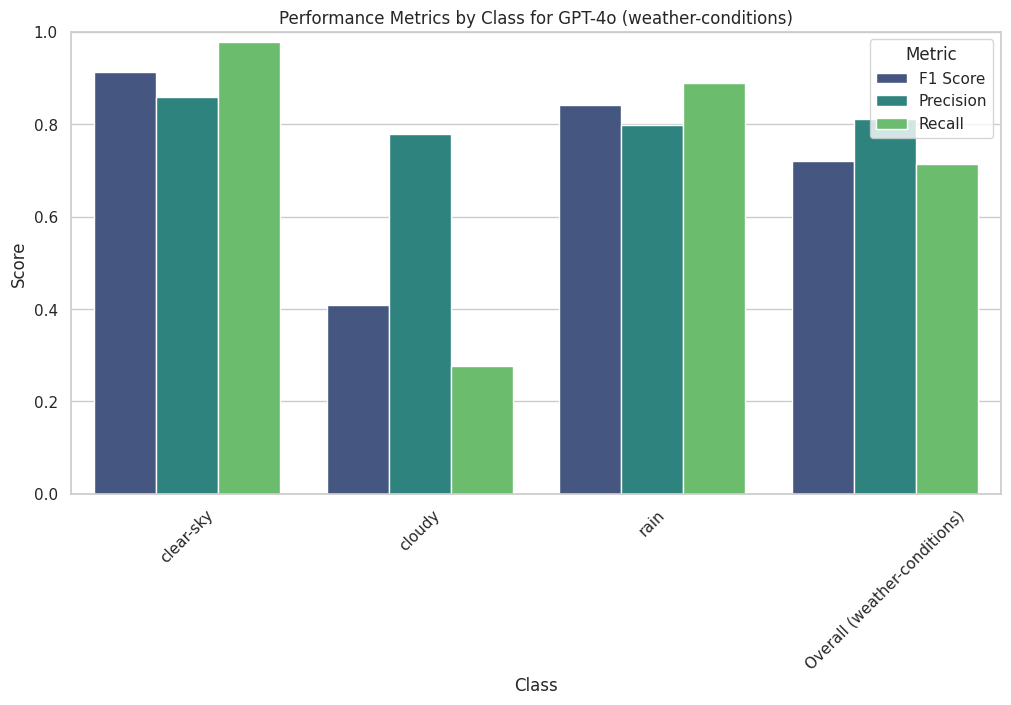

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

categories = combined_df["Category"].unique()
models = combined_df["Model"].unique()
metrics = ['F1 Score', 'Precision', 'Recall']

selected_category = categories[4]
selected_model = models[0]

model_data = combined_df[(combined_df["Category"] == selected_category) & (combined_df["Model"] == selected_model)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
df_melted = model_data.melt(id_vars=["Class"], value_vars=metrics, var_name="Metric", value_name="Score")
sns.barplot(data=df_melted, x="Class", y="Score", hue="Metric", palette="viridis")
plt.xticks(rotation=45)
plt.title(f"Performance Metrics by Class for {selected_model} ({selected_category})")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.show()

performance_table = model_data.pivot(index="Class", columns="Model", values=metrics).round(4)

In [5]:
performance_table

F1 Score Precision  Recall
Model                          GPT-4o    GPT-4o  GPT-4o
Class                                                  
Overall (weather-conditions)   0.7213    0.8115  0.7149
clear-sky                      0.9142    0.8580  0.9781
cloudy                         0.4079    0.7781  0.2764
rain                           0.8418    0.7983  0.8903

In [6]:
all_classes_in_category = combined_df[combined_df["Category"] == "weather-conditions"]["Class"].unique()
print("Classes in 'weather-conditions':", all_classes_in_category)


Classes in 'weather-conditions': ['clear-sky' 'cloudy' 'rain' 'Overall (weather-conditions)']


In [6]:
df_labels = pd.read_csv('results/Labels.csv')
df_predictions = pd.read_csv('results/GPT-4o.csv')

In [7]:
from sklearn.metrics import f1_score

merged_df = pd.merge(df_labels, df_predictions, on='id', suffixes=('_true', '_pred'))
y_true = merged_df["weather-conditions_true"].astype(str)
y_pred = merged_df["weather-conditions_pred"].astype(str)

labels = sorted(set(y_true) | set(y_pred))

class_f1_scores = f1_score(y_true, y_pred, labels=labels, average=None, zero_division=0)

f1_per_class = pd.DataFrame({"Class": labels, "F1 Score": class_f1_scores})
f1_per_class

Class  F1 Score
0  clear-sky  0.910311
1     cloudy  0.404647
2        fog  0.000000
3       rain  0.834827
4       snow  0.000000
5    unknown  0.000000

In [8]:
overall_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
overall_f1

0.3582976364012411

In [9]:
merged_df = pd.merge(df_labels, df_predictions, on='id', suffixes=('_true', '_pred'))

In [10]:
merged_df

id main-event_true location_true zone_true  \
0      clgr0y79557jk076o681egs6p  near-collision     main-road     urban   
1      clgr0y79657lc076o46dt0xjb  near-collision     main-road     urban   
2      clgr0y79657n0076og7w6grt8  near-collision     main-road     urban   
3      clgr0y7973glw0791gwwz2vd4  near-collision     main-road     urban   
4      clgr0y7973gm407912vru07yd  near-collision     main-road     urban   
...                          ...             ...           ...       ...   
10491  cljex08nl2m93077n9t2jc06n  near-collision     main-road     urban   
10492  cljex08nn19z507403nkf20fk       collision       highway   unknown   
10493  cljex08sa1eg507409e539opy  near-collision     main-road     urban   
10494  cljex09rl26px075u2woa9ziz  near-collision       highway     rural   
10495  cljex09rr276l075u01ec2k67  near-collision     main-road   suburbs   

      light-conditions_true weather-conditions_true vehicles-density_true  \
0                     night               clear-sky                  high   
1                  twilight               clear-sky                  high   
2                  daylight                  cloudy                medium   
3                  daylight               clear-sky                medium   
4                     night               clear-sky                   low   
...                     ...                     ...                   ...   
10491                 night               clear-sky                  high   
10492              daylight               clear-sky                  high   
10493              daylight               clear-sky                  high   
10494              daylight               clear-sky                medium   
10495              twilight               clear-sky                medium   

      main-event_pred location_pred zone_pred light-conditions_pred  \
0      normal-driving     main-road     urban                 night   
1      normal-driving     main-road     urban              twilight   
2      normal-driving     main-road     urban              daylight   
3      normal-driving       highway     urban              daylight   
4      normal-driving     main-road     urban                 night   
...               ...           ...       ...                   ...   
10491  normal-driving     main-road     urban                 night   
10492  normal-driving       highway     urban              daylight   
10493  normal-driving     main-road     urban              daylight   
10494  normal-driving       highway   suburbs              daylight   
10495  normal-driving     main-road     urban                 night   

      weather-conditions_pred vehicles-density_pred  
0                   clear-sky                medium  
1                   clear-sky                  high  
2                        rain                medium  
3                   clear-sky                medium  
4                   clear-sky                medium  
...                       ...                   ...  
10491               clear-sky                medium  
10492               clear-sky                medium  
10493               clear-sky                medium  
10494               clear-sky                medium  
10495               clear-sky                medium  

[10496 rows x 13 columns]

In [11]:
for category in ['main-event', 'location', 'zone', 'light-conditions', 'weather-conditions', 'vehicles-density']:
    valid_values = df_labels[f"{category}"].unique().astype(str)
    merged_df = merged_df[merged_df[f"{category}_pred"].astype(str).isin(valid_values)]

In [12]:
merged_df

id main-event_true location_true zone_true  \
79     clgr0v0823dag075s64swej3m  near-collision     main-road     urban   
84     cljewyyws223z075j0gmr2a68  near-collision     main-road     urban   
111    clgr0yhnq0wxa078v64tf1fax       collision     main-road     urban   
218    clgr0y77i5d960796etl94khd  near-collision     main-road     urban   
264    clgr0vkmb1zr80791fpno41uh  near-collision     main-road     urban   
...                          ...             ...           ...       ...   
10236  clgr0y77u5e060796b73g9yzc       collision     main-road     urban   
10249  clgr0y7a84wo8075s40bm20wb       collision       highway   suburbs   
10282  clgr0wqyj0m1v078o5s9edrch       collision     main-road     urban   
10301  clgr0xb9p1jfm0775dvg8h13j       collision     main-road     urban   
10359  clgr0yhoi4mqx076l7msodxut  near-collision     main-road     urban   

      light-conditions_true weather-conditions_true vehicles-density_true  \
79                    night                    rain                   low   
84                 twilight               clear-sky                  high   
111                daylight               clear-sky                   low   
218                   night               clear-sky                  high   
264                daylight               clear-sky                  high   
...                     ...                     ...                   ...   
10236                 night               clear-sky                  high   
10249              daylight                    rain                medium   
10282              daylight               clear-sky                medium   
10301                 night               clear-sky                medium   
10359                 night               clear-sky                  high   

      main-event_pred location_pred zone_pred light-conditions_pred  \
79     near-collision     main-road     urban                 night   
84     near-collision     main-road     urban                 night   
111    near-collision     main-road     urban              daylight   
218    near-collision     main-road     urban                 night   
264    near-collision     main-road     urban              daylight   
...               ...           ...       ...                   ...   
10236  near-collision     main-road     urban                 night   
10249       collision       highway     urban              daylight   
10282       collision     main-road     urban              daylight   
10301       collision     main-road     urban                 night   
10359  near-collision     main-road     urban                 night   

      weather-conditions_pred vehicles-density_pred  
79                  clear-sky                medium  
84                  clear-sky                medium  
111                 clear-sky                   low  
218                 clear-sky                medium  
264                 clear-sky                medium  
...                       ...                   ...  
10236               clear-sky                medium  
10249                    rain                   low  
10282               clear-sky                medium  
10301               clear-sky                medium  
10359               clear-sky                medium  

[211 rows x 13 columns]